In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")


In [2]:
df = pd.read_csv("US_Accidents_March23.csv")


In [3]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [4]:
cols = [
    'Severity', 'Start_Time', 'Weather_Condition',
    'Visibility(mi)', 'Precipitation(in)',
    'Temperature(F)', 'Humidity(%)',
    'Wind_Speed(mph)', 'Start_Lat', 'Start_Lng'
]

df = df[cols]


In [5]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()


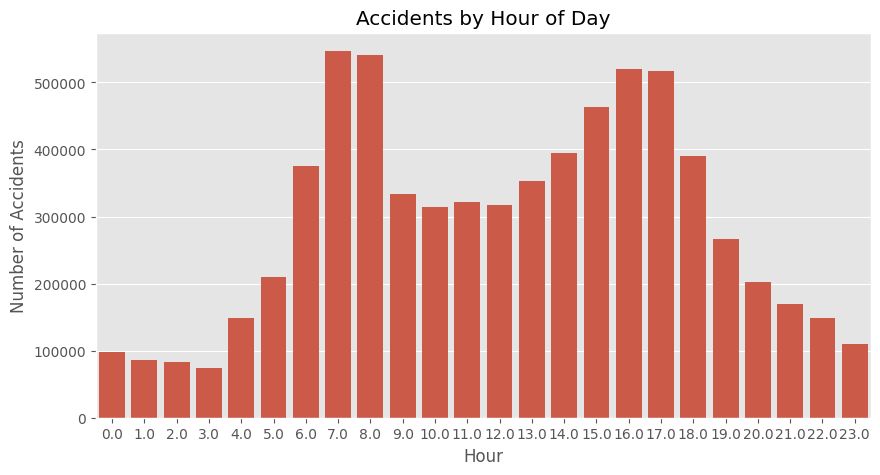

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()


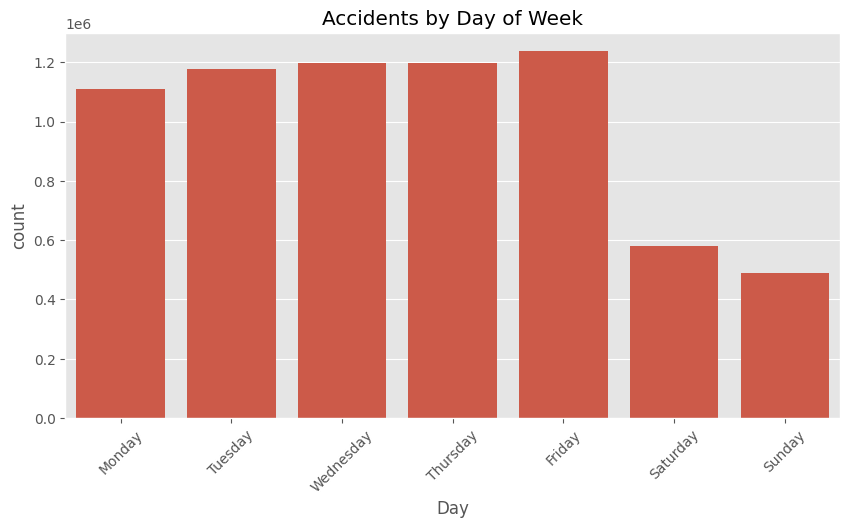

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(
    x='Day',
    data=df,
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
plt.xticks(rotation=45)
plt.title("Accidents by Day of Week")
plt.show()


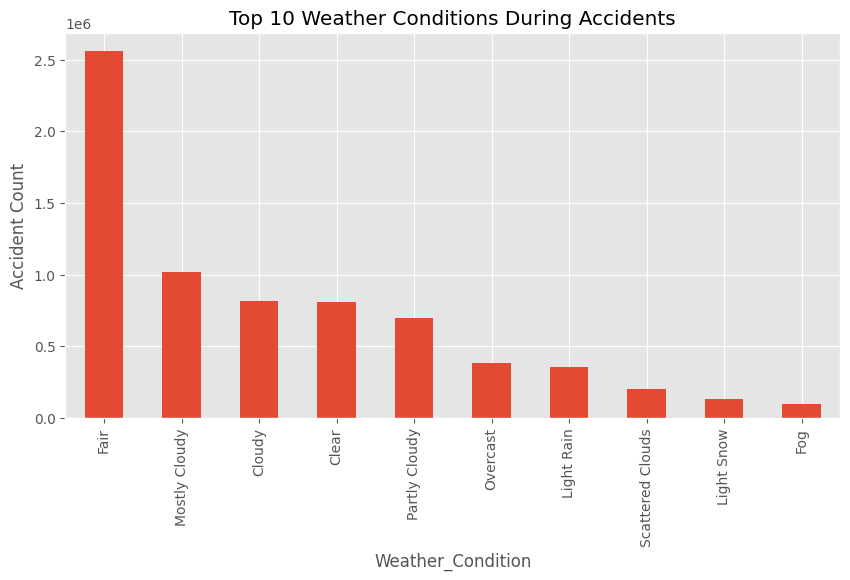

In [8]:
top_weather = df['Weather_Condition'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_weather.plot(kind='bar')
plt.title("Top 10 Weather Conditions During Accidents")
plt.ylabel("Accident Count")
plt.show()


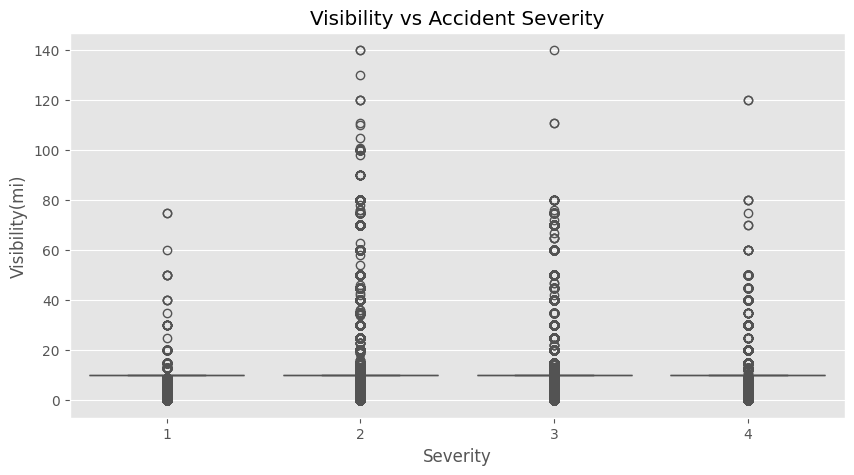

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Severity', y='Visibility(mi)', data=df)
plt.title("Visibility vs Accident Severity")
plt.show()


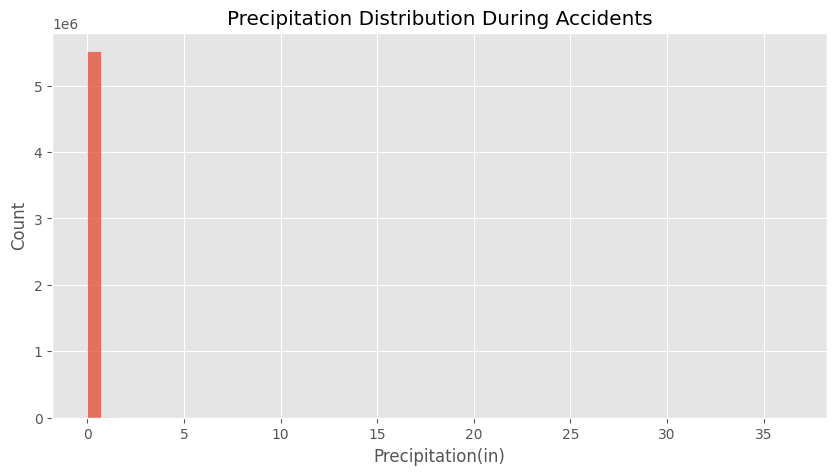

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df['Precipitation(in)'], bins=50)
plt.title("Precipitation Distribution During Accidents")
plt.show()


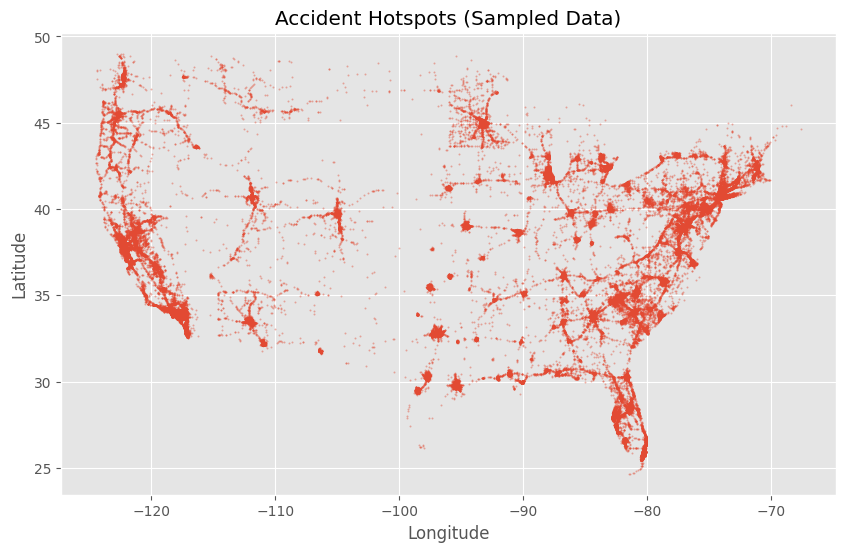

In [11]:
sample_df = df.sample(100000)

plt.figure(figsize=(10,6))
plt.scatter(
    sample_df['Start_Lng'],
    sample_df['Start_Lat'],
    s=1,
    alpha=0.3
)
plt.title("Accident Hotspots (Sampled Data)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


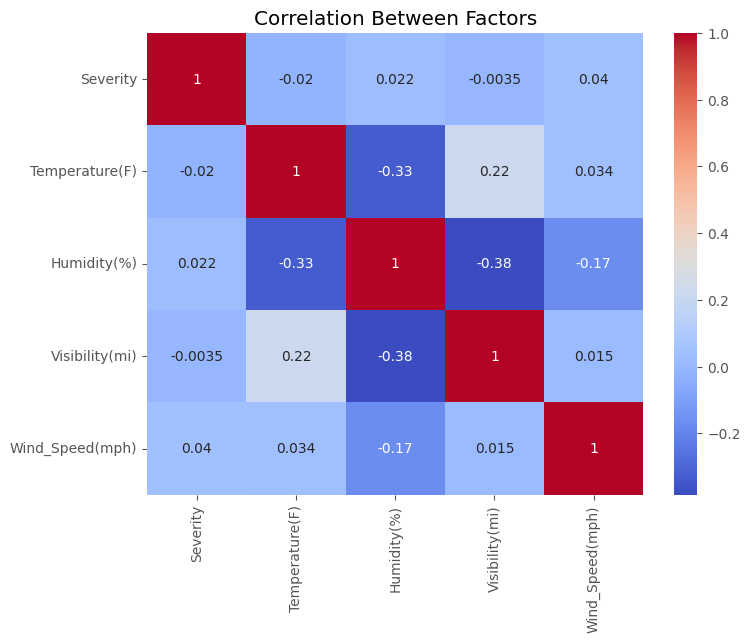

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df[['Severity','Temperature(F)','Humidity(%)','Visibility(mi)','Wind_Speed(mph)']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Between Factors")
plt.show()
